# Experiment 2 - Self-evaluation and ephemerality in "simple"

## Preliminary actions

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random
import math

In [5]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Notebook variables

In [2]:
exp_number = 2

seeds = range(1,51)
n_episodes = 1
max_steps = 100
game = "simple"

In [ ]:
max_scores = [8,10,7,10,7,10,7,10,7,7,
              7,10,10,8,10,10,10,10,7,7,
              8,10,10,10,10,7,7,7,7,7,
              8,8,7,10,7,10,10,10,7,8,
              7,10,7,10,10,7,10,7,10,8]

In [3]:
with open(f"./Experiment 1/max_scores.pickle", "rb") as f:
    max_scores = pickle.load(f)
    print("Data loaded.")

Data loaded.


# Game generation

In [5]:
import subprocess

In [ ]:
for seed in seeds:
    subprocess.run(["tw-make", f"tw-simple",
                    "--rewards", "dense", "--goal", "detailed", "--silent", "--force",
                    "--seed", f"{seed}", "--output", f"games/{game}/seed{seed}.z8"]) 

In [9]:
for seed in seeds:
    subprocess.run(["tw-make", f"tw-cooking",
                    "--go", "1", "--take", "1", "--recipe", "1", "--cut", "--cook",
                    "--seed", f"{seed}", "--force", "--output", f"games/cooking/level1-seed{seed}.z8"]) 

Global seed: 1
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed1.z8
Global seed: 2
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed2.z8
Global seed: 3
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed3.z8
Global seed: 4
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed4.z8
Global seed: 5
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed5.z8
Global seed: 6
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed6.z8
Global seed: 7
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed7.z8
Global seed: 8
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed8.z8
Global seed: 9
Game generated: /TextWorld/notebooks/LLM-PTG/Code/Experiments/games/cooking/level1-seed9.z8
Global seed: 10
Game generated: /Text

# Game playing

In [15]:
with open(f"./Experiment 1/reasoning_{game}.pickle", "rb") as f:
    reasoning = pickle.load(f)
with open(f"./Experiment {exp_number}/reasoning_{game}.pickle", "wb") as f:
    pickle.dump(reasoning, f)

In [8]:
results_all_seeds = []

for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=1, prompt_version="default", reads_own_reasoning=True,
                                        verbose=False, log=f"./Experiment {exp_number}/logs/{game}/1think-seed{seed}.log"),
            f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/1think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")
    f.close()

games/simple/seed1.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed2.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  12.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed7.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 7.
games/simple/seed8.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed9.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 7.
games/simple/seed11.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps:  18.0; avg. score: 10.0 / 10.
games/simple/seed13.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed14.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed15.z8 .  	avg. steps: 100.0; avg. 

This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (40960). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


.  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed25.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed26.z8 .  	avg. steps:   8.0; avg. score:  7.0 / 7.
games/simple/seed27.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed28.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 7.
games/simple/seed29.z8 .  	avg. steps:  19.0; avg. score:  7.0 / 7.
games/simple/seed30.z8 .  	avg. steps:   8.0; avg. score:  7.0 / 7.
games/simple/seed31.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed32.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed33.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 7.
games/simple/seed34.z8 .  	avg. steps:  12.0; avg. score: 10.0 / 10.
games/simple/seed35.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 7.
games/simple/seed36.z8 .  	avg. steps:  16.0; avg. score: 10.0 / 10.
games/simple/seed37.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 10.
games/simple/seed38.z8 .  	avg. steps:  43.0; avg. score: 10.0 / 1

In [10]:
results_all_seeds = []

for seed in seeds:
    results = play(LLMAgentSelfEvaluate(selfeval_turns=1, prompt_version="default", reads_own_reasoning=False,
                                        verbose=False, log=f"./Experiment {exp_number}/logs/{game}/e1think-seed{seed}.log"),
            f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
    results_all_seeds.append(results[0]) # only one episode
with open(f"./Experiment {exp_number}/e1think_{game}.pickle", "wb") as f:
    pickle.dump(results_all_seeds, f)
    print("Data pickled.")
    f.close()

games/simple/seed1.z8 .  	avg. steps:  14.0; avg. score:  8.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  14.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  27.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps:  17.0; avg. score: 10.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps:  27.0; avg. score: 10.0 / 10.
games/simple/seed7.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  20.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  22.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  23.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps:  30.0; avg. score:  8.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  25.0; avg. 

# Data aggregation for visualization

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
final_arrays = {"reasoning": [], "1think": [], "e1think": []}

for model in final_arrays.keys():
    with open(f"./Experiment {exp_number}/{model}_{game}.pickle", "rb") as f:
        results_all_seeds = pickle.load(f)
    final_scores = [run[-1][1] for run in results_all_seeds] # last step, score
    final_arrays[model] = np.array(final_scores) / np.array(max_scores)

# Visualization

In [ ]:
fig, ax = plt.subplots()
data = list(final_arrays.values())
labels = ["base model", "model with reasoning"]
ax.set_ylabel("normalized score")

# boxplot = ax.boxplot(data, patch_artist=True, tick_labels=labels, showfliers=False)
violin = ax.violinplot(data, showmeans=False, showmedians=True, showextrema=False)
for i in range(len(data)):
    points = data[i]
    x = np.random.normal(1+i, 0.0, size=len(points))
    ax.plot(x, points, 'r.', alpha=0.1, markersize=10)

colors = ["skyblue", "orange"]
for box, color in zip(boxplot["boxes"], colors):
    box.set_facecolor(color)

plt.show()

/tmp/ipykernel_3170/168451956.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  swarm = sns.swarmplot(
/usr/local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_3170/168451956.py:33: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  violin = sns.violinplot(x=category_feature, y=data_combined,
/tmp/ipykernel_3170/168451956.py:37: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  violin = sns.violinplot(x=category_feature, y=data_combined,
/usr/local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


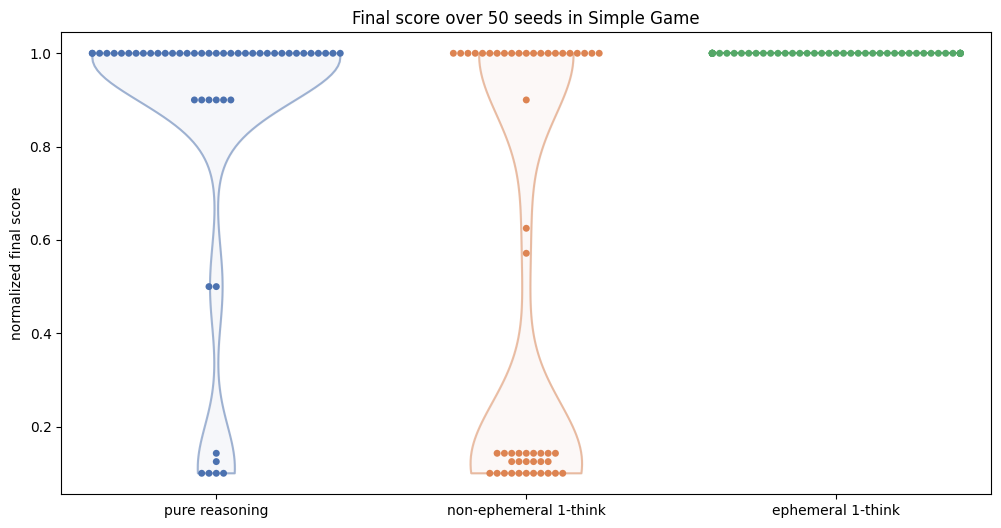

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

data_combined = np.concatenate([final_arrays["reasoning"], final_arrays["1think"], final_arrays["e1think"]])
labels = ["pure reasoning", "non-ephemeral 1-think", "ephemeral 1-think"]
category_feature = [labels[0]] * len(final_arrays["reasoning"]) + [labels[1]] * len(final_arrays["1think"]) + [labels[2]] * len(final_arrays["e1think"])
custom_palette = {"pure reasoning": "#c44e52", "ephemeral 1-think": "#dd8452", "non-ephemeral 1-think": "#55a868"}

swarm = sns.swarmplot(
    x=category_feature,  # Group labels
    ax=ax,
    y=data_combined,  # Numeric variable
    palette=sns.color_palette("deep"),  # Color set used
    hue=category_feature,  # Add a legend
    size=5
)

# strip = sns.stripplot(
#     x=category_feature,  # Group labels
#     ax=ax,
#     y=data_combined,  # Numeric variable
#     palette=sns.color_palette("deep"),  # Color set used
#     hue=category_feature,  # Add a legend
#     size=4,
#     jitter=False,
#     alpha=0.1
# )

# box = sns.boxplot(x=category_feature, y=data_combined,
#                   boxprops={"alpha": 0.2}, showfliers=False,
#                   hue=category_feature, palette=sns.color_palette("deep"),
#                   width=0.5)

violin = sns.violinplot(x=category_feature, y=data_combined,
                        cut=0, inner=None, fill=True,
                        palette=sns.color_palette("deep"), hue=category_feature, alpha=0.05,
                        bw_method=0.3, bw_adjust=1, common_norm=True)
violin = sns.violinplot(x=category_feature, y=data_combined,
                        cut=0, inner=None, fill=False,
                        palette=sns.color_palette("deep"), hue=category_feature, alpha=0.5,
                        bw_method=0.3, bw_adjust=1, common_norm=True)

ax.set_title(f"Final score over {len(seeds)} seeds in Simple Game")
ax.set_ylabel("normalized final score")
plt.show()